<a href="https://colab.research.google.com/github/Lab-of-Infinity/Advanced-Deep-Learning-Based-NLP-Image-Processing-Projects/blob/main/Project_1_Sentence_Embeddings_and_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentence Embeddings and Similarity Sentence Transformer

- SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings. The initial work is described in our paper Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.

- You can use this framework to compute sentence / text embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning. This can be useful for semantic textual similar, semantic search, or paraphrase mining.

- The framework is based on PyTorch and Transformers and offers a large collection of pre-trained models tuned for various tasks. Further, it is easy to fine-tune your own models.

In [ ]:
# Installation of Sentence transformers
%pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4a5de5c22bd9b2ee6fdd38ecc07a1616e67d451ae27fa5ac27a3e0ef108785d9
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer,util

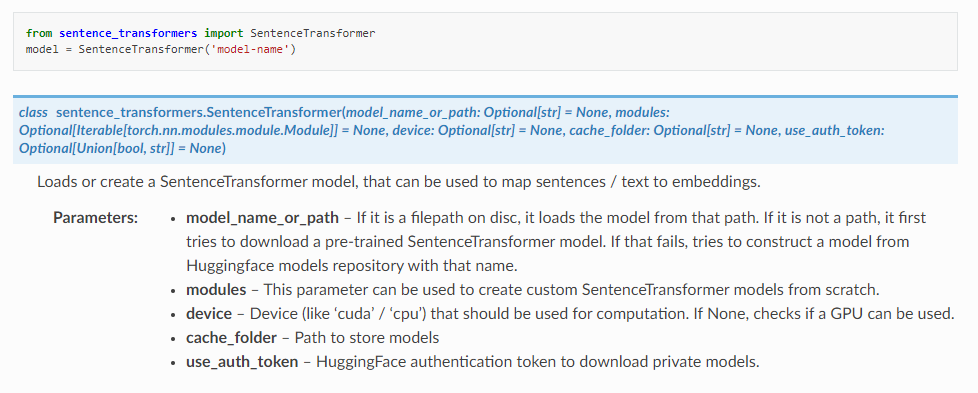

Pretrained Models

https://www.sbert.net/docs/pretrained_models.html

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sentences = ['the cat sits outside','the new movie is awesome','the new movie is really great', "the dog bark on stangers"]

In [ ]:
embeddings = model.encode(sentences=sentences, convert_to_tensor=True)

In [ ]:
from transformers.models.esm.modeling_tf_esm import Embedding
for sent,embed in zip(sentences,embeddings):
  print('Sentence :', sent)
  print("Length of Embedding :", len(embed))
  #print("Embeddings: ", embed)

Sentence : the cat sits outside
Length of Embedding : 384
Sentence : the new movie is awesome
Length of Embedding : 384
Sentence : the new movie is really great
Length of Embedding : 384
Sentence : the dog bark on stangers
Length of Embedding : 384


In [ ]:
cosine_scores= util.cos_sim(embeddings,embeddings)

In [ ]:
cosine_scores

tensor([[ 1.0000, -0.0247, -0.0258,  0.1578],
        [-0.0247,  1.0000,  0.9074,  0.0984],
        [-0.0258,  0.9074,  1.0000,  0.1001],
        [ 0.1578,  0.0984,  0.1001,  1.0000]], device='cuda:0')

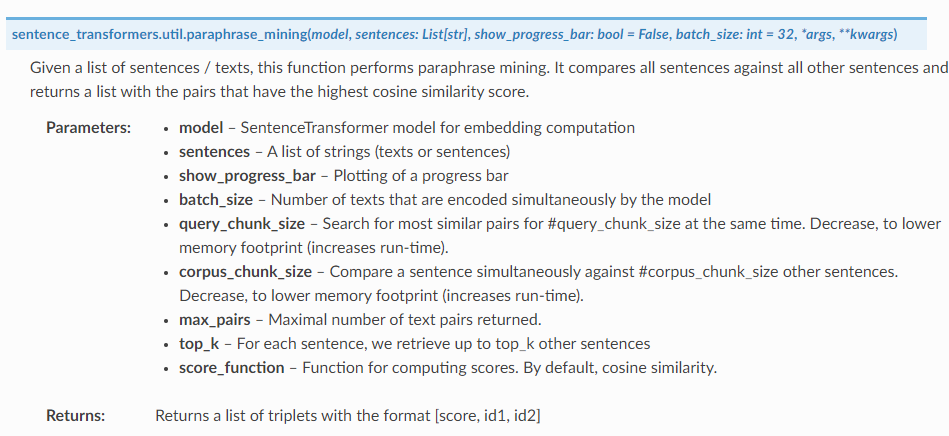

In [ ]:
paraphrases = util.paraphrase_mining(model,sentences)

In [ ]:
for similarity in paraphrases:
  score,i,j = similarity
  print(sentences[i], "<>", sentences[j], "-->", score)

the new movie is awesome <> the new movie is really great --> 0.9074223041534424
the cat sits outside <> the dog bark on stangers --> 0.15776793658733368
the new movie is really great <> the dog bark on stangers --> 0.10014542192220688
the new movie is awesome <> the dog bark on stangers --> 0.09836854040622711
the cat sits outside <> the new movie is awesome --> -0.02468010224401951
the cat sits outside <> the new movie is really great --> -0.025751957669854164
